In [106]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy

import pandas as pd
import numpy as np

In [107]:
import nltk
import re
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt

from pprint import pprint

In [108]:
from nltk.corpus import stopwords

In [135]:
#nltk.download('stopwords')
stop_words = stopwords.words("english")
stop_words.extend(['from', 'subject','re','edu','use','let','get','know','think','say','today'])

stop_words.extend(['development', 'project','research','develop','study','technology','system','model','high','design','tool','solution',
                  'base','method','time','provide','aim','process'])

stop_words.extend(['increase','objective','approach','application','work','innovation','cost','large','new','create','creation','platform',
                  'field','test','innovative','change','low','imporve','market','support','make'])

stop_words.extend(['goal','achieve','direct','main','reach','impact','key','ambitious','effort','relevant',
                   'market', 'year', 'company', 'revenue', 'expect', 'grow', 'sale', 'estimate', 'product'])

In [136]:
objective_df = pd.read_csv(r"C:\Users\mayuan\Desktop\BMRCproject\output_df.csv", usecols=["title","objective"],encoding='ISO-8859-1')

In [153]:
full_df = pd.read_csv(r"C:\Users\mayuan\Desktop\BMRCproject\output_df.csv",encoding='ISO-8859-1')

In [113]:
pd.set_option('display.max_colwidth', None)

data = []

for index, row in objective_df.iterrows():
    row_data = row['title'] + " " + row['title'] + " " + row['objective']
    data.append(re.sub(r"[^a-zA-Z0-9]+", ' ', row_data).lower())
    
# data = objective_df.objective.values.tolist()
# #data = [re.sub('\s+',' ', sent) for sent in data]
# data = [re.sub(r"[^a-zA-Z0-9]+", ' ', sent) for sent in data]

# pd.reset_option('display')
print(data[0])

the international network on crisis translation the international network on crisis translation we propose to establish an interdisciplinary intersectoral and international research and innovation network in crisis translation called interact crisis translation is understood here as the translation of written information from one linguistic and cultural system to another in the context of a crisis scenario with a view to enabling affected communities and responders to be prepared for crises improve resilience and reduce the loss of lives due to the transboundary nature of modern day crises crisis communication must be multilingual and multilingual crisis communication is enabled through translation multilingual information access through translation addresses work programme aims such as social fairness and democratic access to essential information for all the primary focus of interact is on health related crisis content the main objectives of the project are 1 to make meaningful and e

In [114]:
def sent_to_words(sen):
    for s in sen:
        yield(gensim.utils.simple_preprocess(str(s), deacc=True))

data_words = list(sent_to_words(data))
print(data_words[0])

['the', 'international', 'network', 'on', 'crisis', 'translation', 'the', 'international', 'network', 'on', 'crisis', 'translation', 'we', 'propose', 'to', 'establish', 'an', 'intersectoral', 'and', 'international', 'research', 'and', 'innovation', 'network', 'in', 'crisis', 'translation', 'called', 'interact', 'crisis', 'translation', 'is', 'understood', 'here', 'as', 'the', 'translation', 'of', 'written', 'information', 'from', 'one', 'linguistic', 'and', 'cultural', 'system', 'to', 'another', 'in', 'the', 'context', 'of', 'crisis', 'scenario', 'with', 'view', 'to', 'enabling', 'affected', 'communities', 'and', 'responders', 'to', 'be', 'prepared', 'for', 'crises', 'improve', 'resilience', 'and', 'reduce', 'the', 'loss', 'of', 'lives', 'due', 'to', 'the', 'transboundary', 'nature', 'of', 'modern', 'day', 'crises', 'crisis', 'communication', 'must', 'be', 'multilingual', 'and', 'multilingual', 'crisis', 'communication', 'is', 'enabled', 'through', 'translation', 'multilingual', 'infor

In [115]:
# build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold = 100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

print(trigram_mod[bigram_mod[data_words[0]]])

['the', 'international', 'network', 'on', 'crisis', 'translation', 'the', 'international', 'network', 'on', 'crisis', 'translation', 'we', 'propose', 'to', 'establish', 'an', 'intersectoral', 'and', 'international', 'research', 'and', 'innovation', 'network', 'in', 'crisis', 'translation', 'called', 'interact', 'crisis', 'translation', 'is', 'understood', 'here', 'as', 'the', 'translation', 'of', 'written', 'information', 'from', 'one', 'linguistic', 'and', 'cultural', 'system', 'to', 'another', 'in', 'the', 'context', 'of', 'crisis', 'scenario', 'with', 'view', 'to', 'enabling', 'affected', 'communities', 'and', 'responders', 'to', 'be', 'prepared', 'for', 'crises', 'improve', 'resilience', 'and', 'reduce', 'the', 'loss', 'of', 'lives', 'due', 'to', 'the', 'transboundary', 'nature', 'of', 'modern', 'day', 'crises', 'crisis', 'communication', 'must', 'be', 'multilingual', 'and', 'multilingual', 'crisis', 'communication', 'is', 'enabled', 'through', 'translation', 'multilingual', 'infor

In [116]:
def  remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigram(texts):
    return [trigram_mod[bigram[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [137]:
#data_words_nostops = remove_stopwords(data_words)

#data_words_bigrams = make_bigrams(data_words_nostops)
data_words_bigrams = make_bigrams(data_words)

nlp = spacy.load('en', disable=['parser', 'ner'])

data_lemmatized = lemmatization(data_words_bigrams)

data_lemmatized = remove_stopwords(data_lemmatized)

print(data_lemmatized[0])

['international', 'network', 'crisis', 'translation', 'international', 'network', 'crisis', 'translation', 'propose', 'establish', 'intersectoral', 'international', 'network', 'crisis', 'translation', 'call', 'crisis', 'translation', 'understand', 'translation', 'write', 'information', 'linguistic', 'cultural', 'context', 'crisis', 'scenario', 'view', 'enable', 'affected', 'community', 'responder', 'prepare', 'crisis', 'improve', 'resilience', 'reduce', 'loss', 'life', 'transboundary', 'nature', 'modern', 'day', 'crise', 'crisis', 'communication', 'must', 'multilingual', 'multilingual', 'crisis', 'communication', 'enable', 'translation', 'multilingual', 'information', 'access', 'translation', 'address', 'programme', 'social', 'fairness', 'democratic', 'access', 'essential', 'information', 'primary', 'focus', 'health', 'related', 'crisis', 'content', 'meaningful', 'effective', 'contribution', 'knowledge', 'policy', 'expertise', 'training', 'enable', 'accurate', 'timely', 'translation', 

In [138]:
id2word = corpora.Dictionary(data_lemmatized)

texts = data_lemmatized

corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[0])

[(0, 2), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 6), (12, 4), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 2), (19, 1), (20, 15), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 5), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 3), (35, 2), (36, 1), (37, 1), (38, 1), (39, 2), (40, 1), (41, 1), (42, 3), (43, 1), (44, 3), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 2), (56, 3), (57, 1), (58, 1), (59, 1), (60, 3), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 11), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1)]


In [139]:
n_topics = 300

In [120]:
lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus,
                                           id2word = id2word,
                                           num_topics = n_topics,
                                           random_state = 100,
                                           update_every = 1,
                                           chunksize=100,
                                           passes =10,
                                           alpha='auto',
                                           per_word_topics=True)

In [121]:
pprint(lda_model.print_topics())

[(102,
  '0.000*"datamede" + 0.000*"datafie" + 0.000*"segmenting" + 0.000*"atlantis" '
  '+ 0.000*"ig" + 0.000*"unquestioned" + 0.000*"geri" + 0.000*"legitimising" + '
  '0.000*"gcms" + 0.000*"institu"'),
 (85,
  '0.000*"datamede" + 0.000*"datafie" + 0.000*"segmenting" + 0.000*"atlantis" '
  '+ 0.000*"ig" + 0.000*"unquestioned" + 0.000*"geri" + 0.000*"legitimising" + '
  '0.000*"gcms" + 0.000*"institu"'),
 (164,
  '0.000*"datamede" + 0.000*"datafie" + 0.000*"segmenting" + 0.000*"atlantis" '
  '+ 0.000*"ig" + 0.000*"unquestioned" + 0.000*"geri" + 0.000*"legitimising" + '
  '0.000*"gcms" + 0.000*"institu"'),
 (59,
  '0.000*"datamede" + 0.000*"datafie" + 0.000*"segmenting" + 0.000*"atlantis" '
  '+ 0.000*"ig" + 0.000*"unquestioned" + 0.000*"geri" + 0.000*"legitimising" + '
  '0.000*"gcms" + 0.000*"institu"'),
 (179,
  '0.000*"datamede" + 0.000*"datafie" + 0.000*"segmenting" + 0.000*"atlantis" '
  '+ 0.000*"ig" + 0.000*"unquestioned" + 0.000*"geri" + 0.000*"legitimising" + '
  '0.000*"gcms

In [122]:
doc_lda = lda_model[corpus]

print('\nPerplexity: ', lda_model.log_perplexity(corpus))

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -50.89402868280122

Coherence Score:  0.4096086534657746


In [123]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

TypeError: Object of type 'complex' is not JSON serializable

PreparedData(topic_coordinates=                        x                   y  topics  cluster       Freq
topic                                                                    
117   -0.132549+0.000000j -0.295604+0.000000j       1        1  10.983987
91    -0.131036+0.000000j -0.221860+0.000000j       2        1   6.323320
46    -0.130557+0.000000j -0.165323+0.000000j       3        1   4.759620
75    -0.125764+0.000000j -0.133894+0.000000j       4        1   2.618429
109   -0.122427+0.000000j -0.086441+0.000000j       5        1   2.419686
...                   ...                 ...     ...      ...        ...
84     0.347282+0.000000j -0.011400+0.000000j     196        1   0.001249
140    0.347282+0.000000j -0.011400+0.000000j     197        1   0.001249
114    0.347282+0.000000j -0.011400+0.000000j     198        1   0.001249
59     0.347282+0.000000j -0.011400+0.000000j     199        1   0.001249
85     0.347282+0.000000j -0.011400+0.000000j     200        1   0.001249

[200 r

In [140]:
import os

os.environ['MALLET_HOME'] = 'C:/Users/mayuan/Desktop/BMRCproject/mallet-2.0.8'

mallet_path = 'C:\\Users\\mayuan\\Desktop\\BMRCproject\\mallet-2.0.8\\bin\\mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus = corpus, num_topics = n_topics, id2word=id2word)

In [141]:
#print(ldamallet.show_topics())
topic_dic = {}
for key, words in ldamallet.show_topics(num_topics= n_topics):
    word_list = words.split("+")
    new_list = []
    for item in word_list:
        item.strip()
        item_list = item.split('*')
        #print(item_list)
        #numb = item_list[0].strip()
        w = item_list[1].strip()
        new_list.append(w)
    topic_dic[key] = new_list
    #topic_dic[key] = word_list

print("n_topics = " + str(n_topics))
print(topic_dic)

fileDir = 'C:/Users/mayuan/Desktop/BMRCproject/'
pplogFile = open(fileDir + 'pp_topics_nonum_'+ str(n_topics) +'.txt','w+')

pprint(topic_dic, stream=pplogFile)

pplogFile.close()

n_topics = 300
{0: ['"blood"', '"vascular"', '"stroke"', '"disease"', '"endothelial"', '"cardiovascular"', '"treatment"', '"risk"', '"platelet"', '"death"'], 1: ['"group"', '"collective"', '"individual"', '"cooperation"', '"cooperative"', '"focus"', '"involve"', '"establish"', '"member"', '"aspect"'], 2: ['"memory"', '"formation"', '"switch"', '"form"', '"propose"', '"experience"', '"show"', '"investigate"', '"consolidation"', '"finally"'], 3: ['"performance"', '"optimize"', '"optimization"', '"optimal"', '"efficiency"', '"improve"', '"optimisation"', '"efficient"', '"improvement"', '"optimise"'], 4: ['"agriculture"', '"agricultural"', '"crop"', '"farmer"', '"production"', '"soil"', '"sustainable"', '"farm"', '"insect"', '"pest"'], 5: ['"regeneration"', '"sleep"', '"injury"', '"promote"', '"regenerative"', '"repair"', '"adult"', '"induce"', '"follow"', '"show"'], 6: ['"datum"', '"big"', '"data"', '"analytic"', '"information"', '"analysis"', '"open"', '"source"', '"personal"', '"access"

In [142]:
fileDir = 'C:/Users/mayuan/Desktop/BMRCproject/'
# logFile = open(fileDir + 'topics.txt','w+')

# pprint(ldamallet.show_topics(num_topics=55), stream=logFile)

# logFile.close()

coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')

model_ldamallet = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)

coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)
print('\nPerplexity: ', model_ldamallet.log_perplexity(corpus))
# LL/token: -8.7672


Coherence Score:  0.5231549759491573


C:\ProgramData\Miniconda3\lib\site-packages\gensim\models\ldamodel.py:1108: RuntimeWarning: invalid value encountered in multiply
  score += np.sum((self.eta - _lambda) * Elogbeta)



Perplexity:  nan


C:\ProgramData\Miniconda3\lib\site-packages\gensim\models\ldamodel.py:1109: RuntimeWarning: invalid value encountered in subtract
  score += np.sum(gammaln(_lambda) - gammaln(self.eta))


In [143]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model_ldamallet, corpus, id2word)
pyLDAvis.save_html(vis, fileDir+'pyLDAvis-'+ str(n_topics) +'.html')
vis

C:\ProgramData\Miniconda3\lib\site-packages\pyLDAvis\_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
C:\ProgramData\Miniconda3\lib\site-packages\pyLDAvis\_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
C:\ProgramData\Miniconda3\lib\site-packages\pyLDAvis\_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
108    0.103146 -0.009414       1        1  0.650280
221    0.049881  0.026332       2        1  0.605408
240   -0.098804 -0.073411       3        1  0.600898
11     0.138808 -0.073285       4        1  0.565734
236   -0.166582 -0.068160       5        1  0.551483
...         ...       ...     ...      ...       ...
196   -0.049792  0.069195     296        1  0.240152
218    0.024712  0.065219     297        1  0.236645
66    -0.030186  0.121055     298        1  0.236152
279    0.050639  0.091266     299        1  0.228362
15     0.048270  0.103187     300        1  0.227398

[300 rows x 5 columns], topic_info=             Term          Freq         Total  Category  logprob  loglift
413          cell  16523.000000  16523.000000   Default  30.0000  30.0000
206         datum  12266.000000  12266.000000   Default  29.0000  29.0000
60        network   9650.000000   9650.000000   Default  28.0000  28.0000
202       control  10210.000000  10210.000000   Default  27.0000  27.0000
36          human  10536.000000  10536.000000   Default  26.0000  26.0000
...           ...           ...           ...       ...      ...      ...
370   environment     69.802513   7105.184844  Topic300  -4.6735   1.4633
126          idea     53.515260   1333.299869  Topic300  -4.9392   2.8708
1465    introduce     51.188510   1743.232883  Topic300  -4.9836   2.5582
395       require     51.188510   5951.351049  Topic300  -4.9836   1.3304
379          give     45.371633   2968.714545  Topic300  -5.1042   1.9052

[29839 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
57052    291  0.877238     aacct
6886      49  0.892163      aafn
6887     234  0.811418     aafns
43216    292  1.046499       aag
39703    203  0.768133      aaid
...      ...       ...       ...
33951    290  0.915569       zvh
10488    244  1.008962    zygote
18547    244  1.044573   zygotic
56052    278  0.956635    zymvol
26546    269  0.815237  zytronic

[76623 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[109, 222, 241, 12, 237, 285, 167, 247, 198, 270, 221, 52, 262, 14, 212, 277, 174, 223, 101, 45, 153, 166, 181, 281, 257, 70, 115, 202, 275, 86, 85, 220, 200, 213, 66, 142, 287, 7, 156, 63, 155, 53, 122, 5, 141, 90, 96, 234, 128, 13, 163, 73, 177, 239, 65, 243, 201, 118, 249, 193, 179, 47, 207, 46, 144, 279, 276, 268, 194, 284, 34, 157, 169, 91, 168, 172, 192, 48, 38, 62, 36, 94, 4, 235, 210, 251, 68, 224, 49, 25, 137, 161, 79, 19, 20, 236, 95, 99, 171, 158, 108, 22, 27, 154, 54, 132, 164, 289, 88, 76, 102, 291, 140, 250, 227, 58, 135, 255, 186, 89, 134, 125, 288, 233, 33, 152, 146, 150, 294, 299, 182, 133, 286, 71, 50, 75, 104, 138, 187, 77, 266, 87, 218, 226, 139, 173, 225, 252, 97, 64, 254, 189, 253, 199, 9, 148, 265, 82, 130, 245, 283, 282, 127, 145, 80, 188, 240, 272, 136, 56, 228, 295, 81, 107, 261, 215, 105, 298, 263, 43, 78, 209, 114, 232, 246, 183, 31, 180, 84, 59, 37, 18, 175, 149, 231, 51, 159, 24, 267, 72, 185, 260, 126, 28, 297, 21, 23, 55, 123, 278, 230, 98, 120, 103, 124, 41, 17, 184, 165, 292, 296, 242, 11, 293, 259, 256, 264, 121, 10, 100, 39, 69, 195, 216, 300, 229, 258, 273, 32, 113, 143, 111, 248, 106, 119, 206, 29, 1, 30, 205, 2, 238, 290, 44, 42, 208, 191, 244, 204, 57, 110, 211, 217, 93, 203, 160, 116, 269, 112, 274, 176, 40, 117, 131, 60, 271, 26, 92, 162, 3, 15, 8, 151, 170, 214, 178, 6, 147, 61, 74, 196, 35, 190, 129, 83, 197, 219, 67, 280, 16])

In [22]:
def compute_coherence_values(dictionary, corpus, texts, limit, start = 2, step = 3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    
    return model_list, coherence_values

In [81]:
limit = 200; start = 2; step = 10

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=start, limit=limit, step=step)

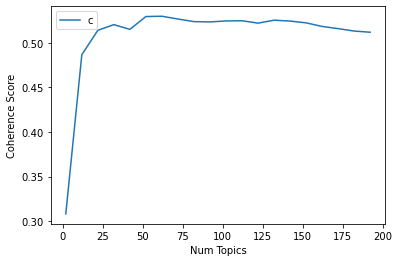

In [82]:
x = range(start, limit, step)

plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence Score")
plt.legend(("coherence_values"))

plt.show()

In [2]:
for m,cv in zip(x, coherence_values):
    print("Num Topics =", m, " has coherence value of ", round(cv,4))

NameError: name 'x' is not defined

In [1]:
optimal_model = model_list[6]
model_topics = optimal_model.show_topics(formatted=False)

print(type(optimal_model.print_topics(num_words=10)))
print(optimal_model.print_topics(num_words=10))

NameError: name 'model_list' is not defined

In [149]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts = data):
    sent_topics_df = pd.DataFrame()
    
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x:(x[1]), reverse=True)
        
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ",".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic, 4), topic_keywords]), ignore_index=True)
            else:
                break
    
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    
    return (sent_topics_df)

In [150]:
df_topic_sents_keywords = format_topics_sentences(ldamodel = ldamallet, corpus=corpus, texts = data)

df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib','Keywords','Text']

df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0           212.0              0.0902   
1            1            14.0              0.1828   
2            2            62.0              0.0971   
3            3            38.0              0.1593   
4            4           108.0              0.1797   
5            5           112.0              0.1145   
6            6            79.0              0.1066   
7            7           177.0              0.1207   
8            8           105.0              0.1913   
9            9            72.0              0.1071   

                                                                                             Keywords  \
0                   policy,economic,inequality,country,economy,analysis,crisis,firm,welfare,empirical   
1                              experience,creative,idea,film,designer,art,form,draw,creativity,artist   
2               health,intervention,care,evidence,outcome,country,population,improve,wellbeing,public   
3                       movement,motor,rehabilitation,muscle,motion,restore,body,recovery,stroke,walk   
4                  training,researcher,academic,train,esr,programme,network,skill,industrial,industry   
5          epigenetic,modification,mechanism,modify,role,specific,define,methylation,histone,identify   
6  disease,inflammation,lung,inflammatory,respiratory,intestinal,chronic,therapeutic,systemic,allergy   
7               conflict,experience,violence,relation,focus,international,war,crisis,military,context   
8             embryo,male,reproductive,sex,female,developmental,fertility,reproduction,early,maternal   
9      bacterial,bacteria,infection,resistance,antibiotic,host,pathogen,antimicrobial,resistant,phage   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [151]:
df_dominant_topic.to_excel(fileDir+'df_dominant_topic_'+ str(n_topics) +'.xlsx')

In [152]:
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
                                            grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)],
                                           axis=0)

sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

sent_topics_sorteddf_mallet.columns = ['Topic_Num','Topic_Perc_Contrib','Keywords','Text']

sent_topics_sorteddf_mallet.head(10)

Topic_Num  Topic_Perc_Contrib  \
0        0.0              0.3301   
1        1.0              0.2187   
2        2.0              0.3038   
3        3.0              0.1162   
4        4.0              0.3434   
5        5.0              0.2358   
6        6.0              0.3325   
7        7.0              0.2335   
8        8.0              0.0862   
9        9.0              0.3416   

                                                                                                   Keywords  \
0                    blood,vascular,stroke,disease,endothelial,cardiovascular,treatment,risk,platelet,death   
1                 group,collective,individual,cooperation,cooperative,focus,involve,establish,member,aspect   
2                    memory,formation,switch,form,propose,experience,show,investigate,consolidation,finally   
3  performance,optimize,optimization,optimal,efficiency,improve,optimisation,efficient,improvement,optimise   
4                         agriculture,agricultural,crop,farmer,production,soil,sustainable,farm,insect,pest   
5                            regeneration,sleep,injury,promote,regenerative,repair,adult,induce,follow,show   
6                                  datum,big,data,analytic,information,analysis,open,source,personal,access   
7                                 active,nuclear,passive,pro,order,reactor,nucleus,facility,neutron,compare   
8   interaction,interact,investigate,complex,understand,understanding,involve,environment,combine,influence   
9                            woman,gender,man,female,perspective,class,issue,country,family,gender_equality   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Text  
0                                                  

In [155]:
sent_topics_sorteddf_mallet.to_excel(fileDir+'most_representative_topic_'+ str(n_topics) +'.xlsx')

In [157]:
# generate full xlsx

kw_df = df_dominant_topic[['Keywords']].copy()
result_df = pd.concat([full_df, kw_df], axis=1)

print(result_df)

       Unnamed: 0     rcn      id      acronym  status  \
0               0  207037  734211     INTERACT  SIGNED   
1               1  199028  686987    BrainHack  SIGNED   
2               2  207221  733174    IMPACT TB  SIGNED   
3               3  207786  700512     CortIMod  CLOSED   
4               4  198320  676144        SyDAD  SIGNED   
...           ...     ...     ...          ...     ...   
23950       23950  200004  696945      IMPRINT  CLOSED   
23951       23951  199486  686711   TiAlCracks  CLOSED   
23952       23952  208744  754436  WhiteRabbit  CLOSED   
23953       23953  213282  790600    QLEX Creo  CLOSED   
23954       23954  220999  839271      CURVE-X  SIGNED   

                                           programme  \
0                                    H2020-EU.1.3.3.   
1                                    H2020-EU.1.2.1.   
2                                    H2020-EU.3.1.6.   
3                                    H2020-EU.1.3.2.   
4                      

In [158]:
result_df.to_excel(fileDir+'result_df_'+ str(n_topics) +'.xlsx')

In [94]:
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
#print(topic_counts)

topic_contribution = round(topic_counts/topic_counts.sum(), 4)
#print(topic_contribution)

topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic','Topic_Keywords']].drop_duplicates()
topic_num_keywords.set_index('Dominant_Topic', inplace=True)
#print(topic_num_keywords)

#df_topics_distribution = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)
df_topics_prec = pd.concat([topic_counts, topic_contribution], axis=1)
df_topics_prec.columns = ['Num_Documents','Perc_Douments']
#print(df_topics_prec)

df_topics_distribution = pd.merge(topic_num_keywords, df_topics_prec, left_index=True, right_index=True)
df_topics_distribution.index.name = 'Dominant_Topic'
df_topics_distribution.sort_index(inplace=True)
#df_topics_distribution.columns = ['Dominant_Topic','Topic_Keywords','Num_Documents','Perc_Douments']

print(df_topics_distribution)

                                                                                              Topic_Keywords  \
Dominant_Topic                                                                                                 
0.0                             market,product,customer,company,business,consumer,price,industry,demand,sale   
1.0                            current,overcome,lack,limitation,limit,barrier,approach,limited,potential,due   
2.0                 test,aircraft,composite,part,weight,performance,testing,component,manufacture,innovative   
3.0               improve,increase,quality,enhance,result,efficiency,reduce,improvement,impact,significantly   
4.0             material,property,application,layer,polymer,mechanical,performance,hybrid,device,fabrication   
...                                                                                                      ...   
95.0                        light,optical,laser,photonic,source,application,pulse,field,nonlinear,genera

In [95]:
df_topics_distribution.to_excel(fileDir+'topics_distribution.xlsx')